# seaborn (violinplot)

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
%config InlineBackend.figure_format = 'retina'

In [2]:
print(f"pandas  version = {pd.__version__}")
print(f"seaborn version = {sns.__version__}")

pandas  version = 0.22.0
seaborn version = 0.8.1


## read miles per gallon dataset (mpg.csv)

In [3]:
url='https://github.com/prasertcbs/tutorial/raw/master/mpg.csv'
df=pd.read_csv(url)
df.sample(5)

,manufacturer,model,displ,year,cyl,trans,drv,cty,hwy,fl,class
87,ford,f150 pickup 4wd,4.6,2008,8,auto(l4),4,13,17,r,pickup
5,audi,a4,2.8,1999,6,manual(m5),f,18,26,p,compact
196,toyota,corolla,1.8,2008,4,manual(m5),f,28,37,r,compact
178,toyota,4runner 4wd,4.7,2008,8,auto(l5),4,14,17,r,suv
201,toyota,toyota tacoma 4wd,2.7,1999,4,auto(l4),4,16,20,r,pickup


In [4]:
df['gear']=df.trans.str[0].map({'a':'auto', 'm':'manual'}).astype("category")
df['drv']=df.drv.map({'f':'front', 'r':'rear', '4':'4-wheel'}).astype('category')
df.sample(5)

,manufacturer,model,displ,year,cyl,trans,drv,cty,hwy,fl,class,gear
181,toyota,camry,2.4,2008,4,manual(m5),front,21,31,r,midsize,manual
131,land rover,range rover,4.2,2008,8,auto(s6),4-wheel,12,18,r,suv,auto
169,subaru,impreza awd,2.5,2008,4,auto(s4),4-wheel,20,25,p,compact,auto
30,chevrolet,k1500 tahoe 4wd,5.7,1999,8,auto(l4),4-wheel,11,15,r,suv,auto
21,chevrolet,c1500 suburban 2wd,5.7,1999,8,auto(l4),rear,13,17,r,suv,auto


## wide format data

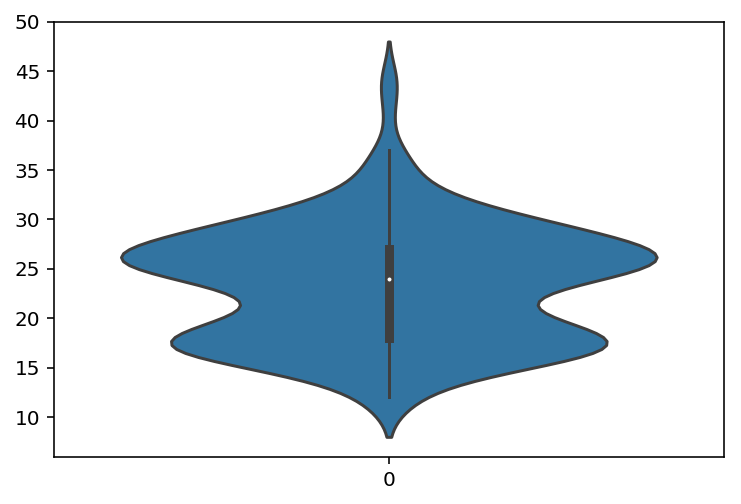

In [5]:
sns.violinplot(data=df['hwy'])

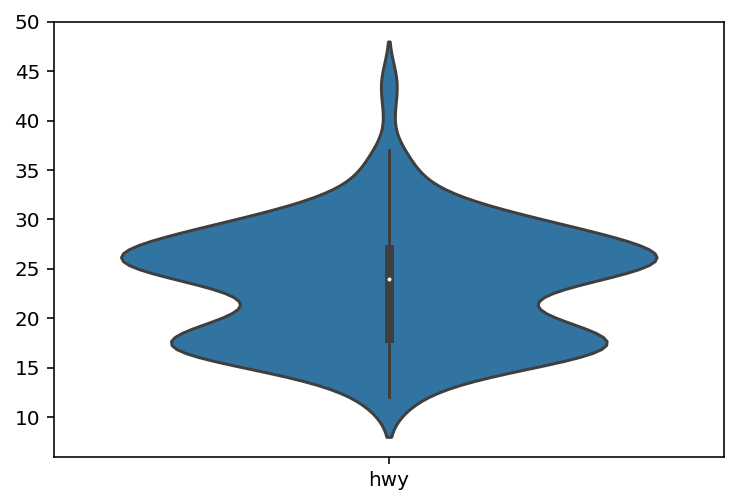

In [6]:
sns.violinplot(data=df[['hwy']])

(2, 2)


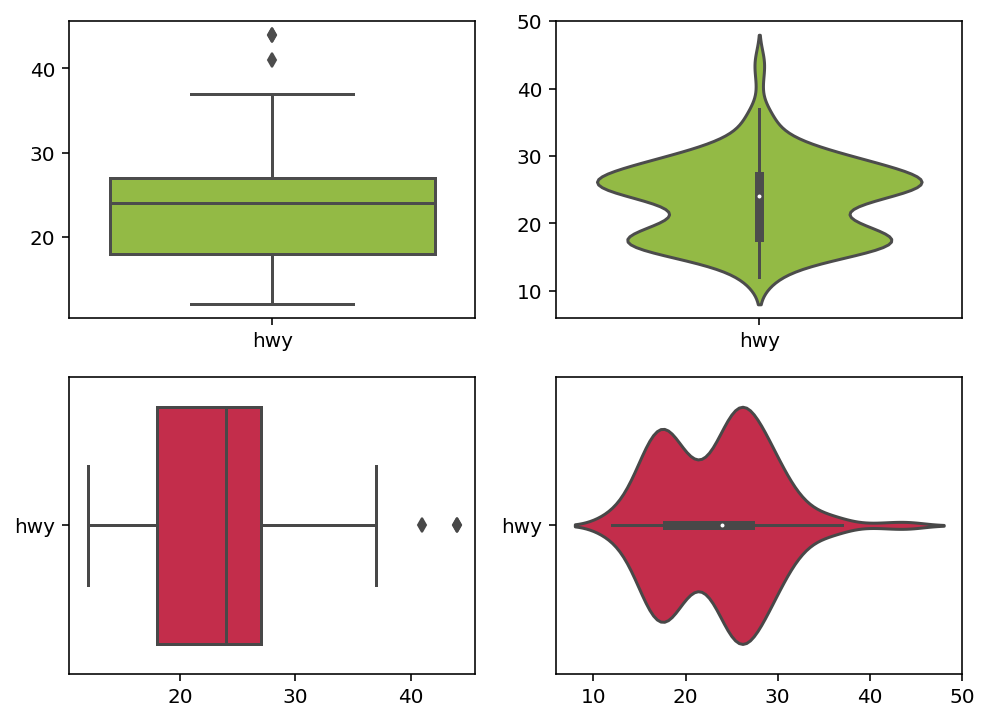

In [7]:
fig, ax = plt.subplots(2, 2, figsize=(8,6))
print(ax.shape)
sns.boxplot(data=df[['hwy']], orient='v', color='yellowgreen', ax=ax[0, 0])
sns.violinplot(data=df[['hwy']], orient='v', color='yellowgreen', ax=ax[0, 1])
sns.boxplot(data=df[['hwy']], orient='h', color='crimson', ax=ax[1, 0])
sns.violinplot(data=df[['hwy']], orient='h', color='crimson', ax=ax[1, 1])

(4,)


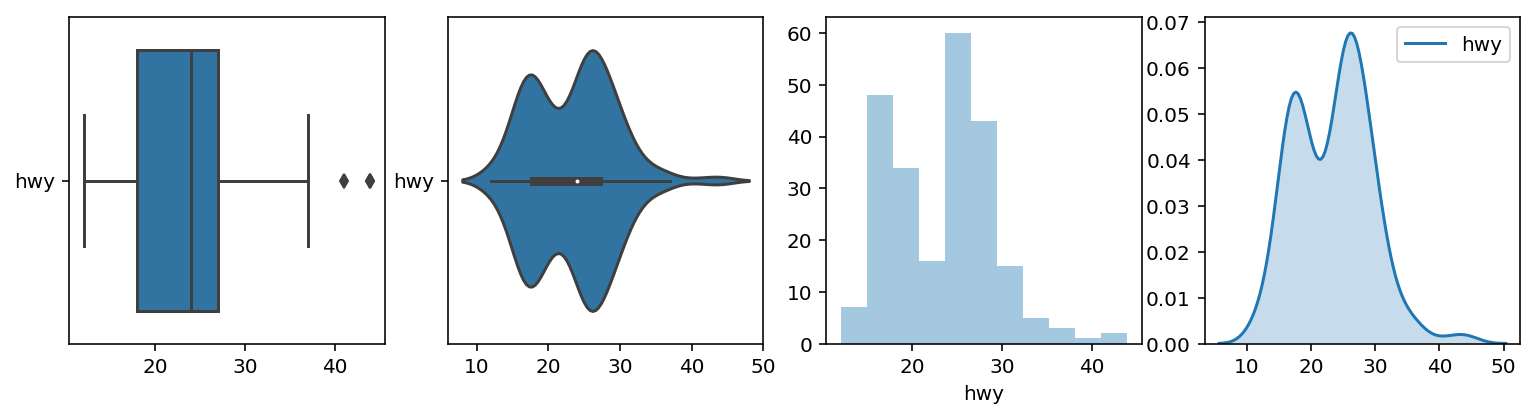

In [8]:
fig, ax = plt.subplots(1, 4, figsize=(13,3))
print(ax.shape)
sns.boxplot(data=df[['hwy']], orient='h', ax=ax[0])
sns.violinplot(data=df[['hwy']], orient='h', ax=ax[1])
sns.distplot(df['hwy'], kde=False, ax=ax[2])
sns.kdeplot(df['hwy'], shade=True, ax=ax[3])

(2, 2)


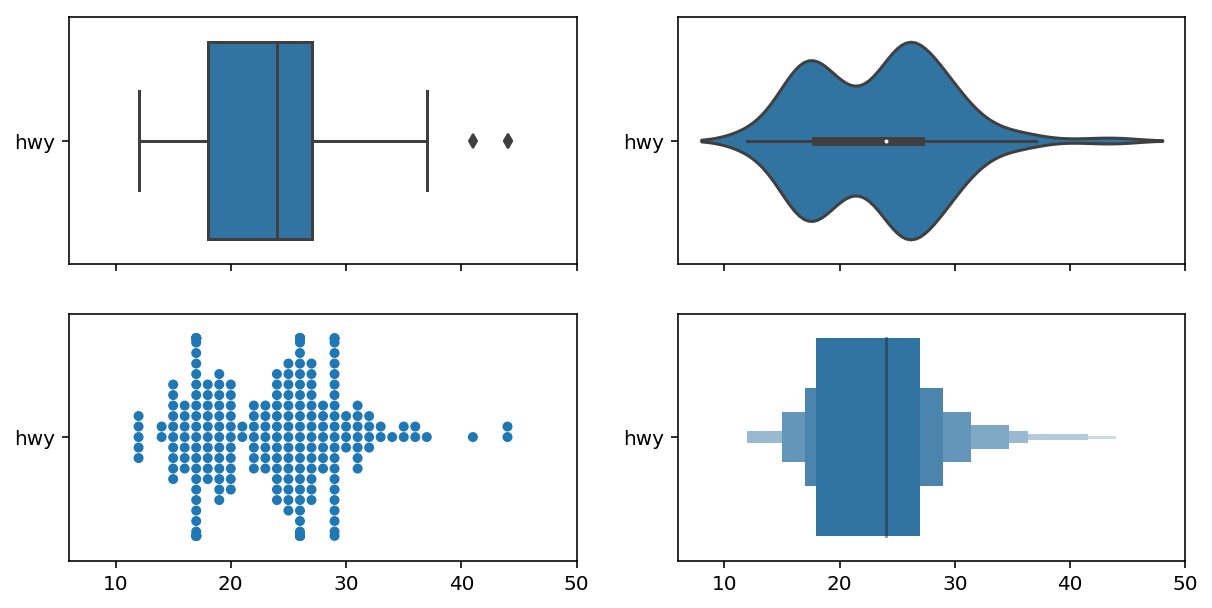

In [9]:
fig, ax = plt.subplots(2, 2, figsize=(10,5), sharex=True)
print(ax.shape)
sns.boxplot(data=df[['hwy']], orient='h', ax=ax[0, 0])
sns.violinplot(data=df[['hwy']], orient='h', ax=ax[0, 1])
sns.swarmplot(data=df[['hwy']], orient='h', ax=ax[1, 0])
sns.lvplot(data=df[['hwy']], orient='h', ax=ax[1, 1])

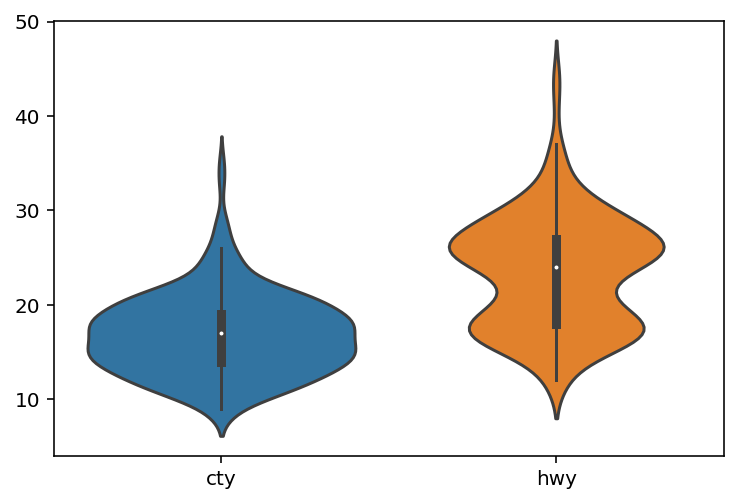

In [10]:
# plt.figure(figsize=(8,5))
sns.violinplot(data=df[['cty', 'hwy']])

(2,)


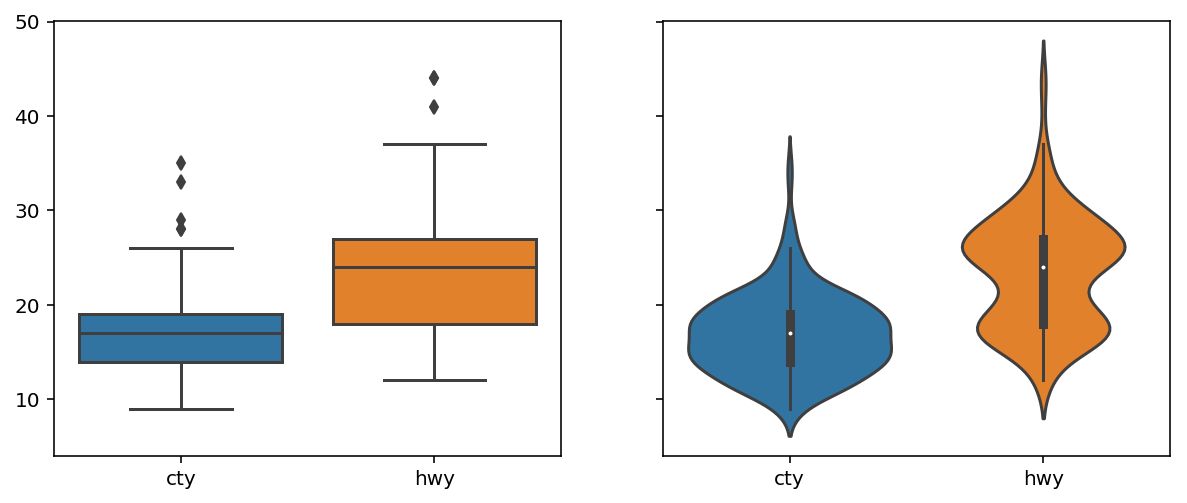

In [11]:
fig, ax = plt.subplots(1, 2, figsize=(10,4), sharey=True, sharex=True)
print(ax.shape)
sns.boxplot(data=df[['cty', 'hwy']], ax=ax[0])
sns.violinplot(data=df[['cty', 'hwy']], ax=ax[1])

(2,)


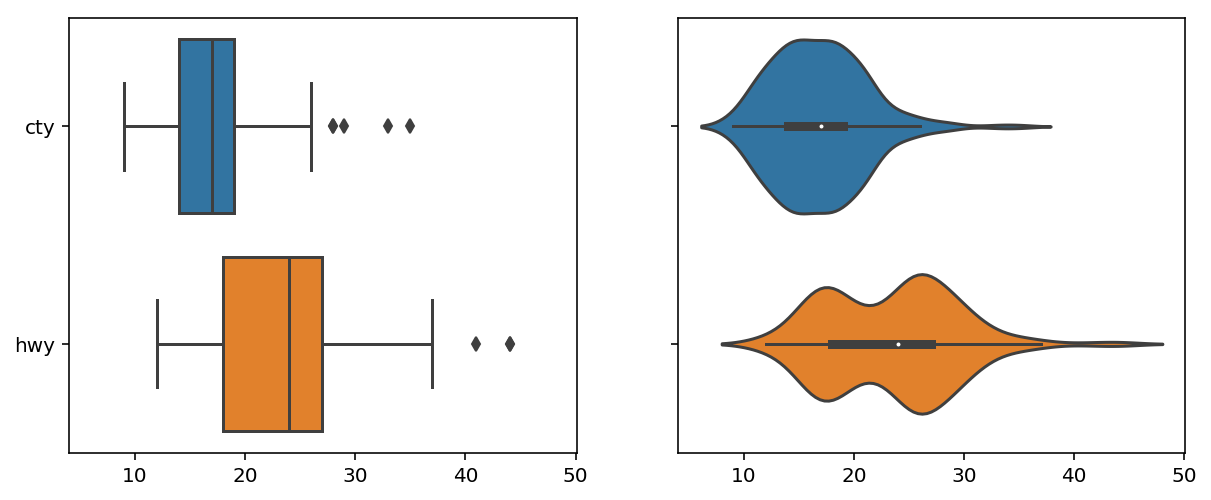

In [12]:
fig, ax = plt.subplots(1, 2, figsize=(10,4), sharey=True, sharex=True)
print(ax.shape)
sns.boxplot(data=df[['cty', 'hwy']], orient='h', ax=ax[0])
sns.violinplot(data=df[['cty', 'hwy']], orient='h', ax=ax[1])

## long format data (pass x and y)

In [13]:
df.head()

,manufacturer,model,displ,year,cyl,trans,drv,cty,hwy,fl,class,gear
0,audi,a4,1.8,1999,4,auto(l5),front,18,29,p,compact,auto
1,audi,a4,1.8,1999,4,manual(m5),front,21,29,p,compact,manual
2,audi,a4,2.0,2008,4,manual(m6),front,20,31,p,compact,manual
3,audi,a4,2.0,2008,4,auto(av),front,21,30,p,compact,auto
4,audi,a4,2.8,1999,6,auto(l5),front,16,26,p,compact,auto


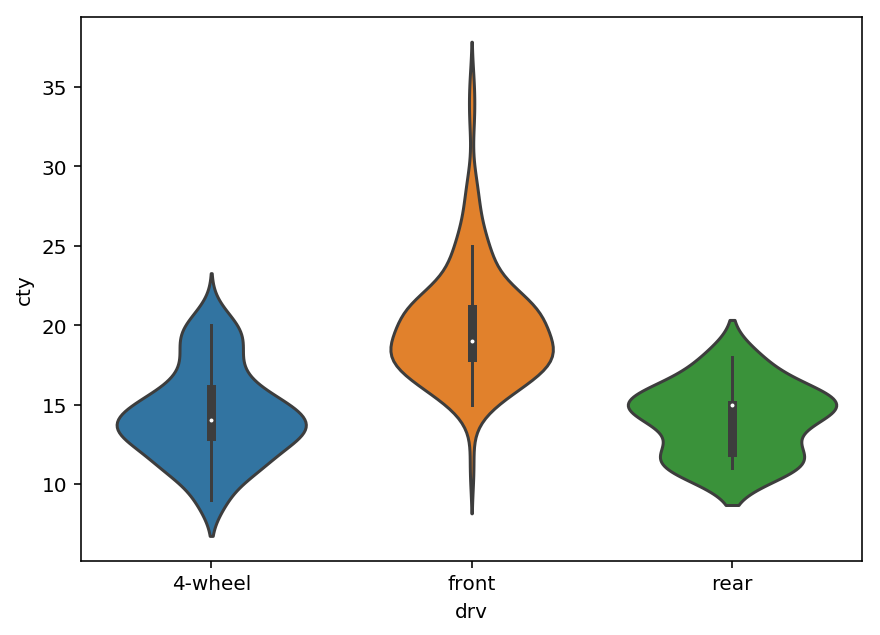

In [14]:
plt.figure(figsize=(7,5))
sns.violinplot(x='drv', y='cty', data=df)

## compare to boxplot and violin

(3,)


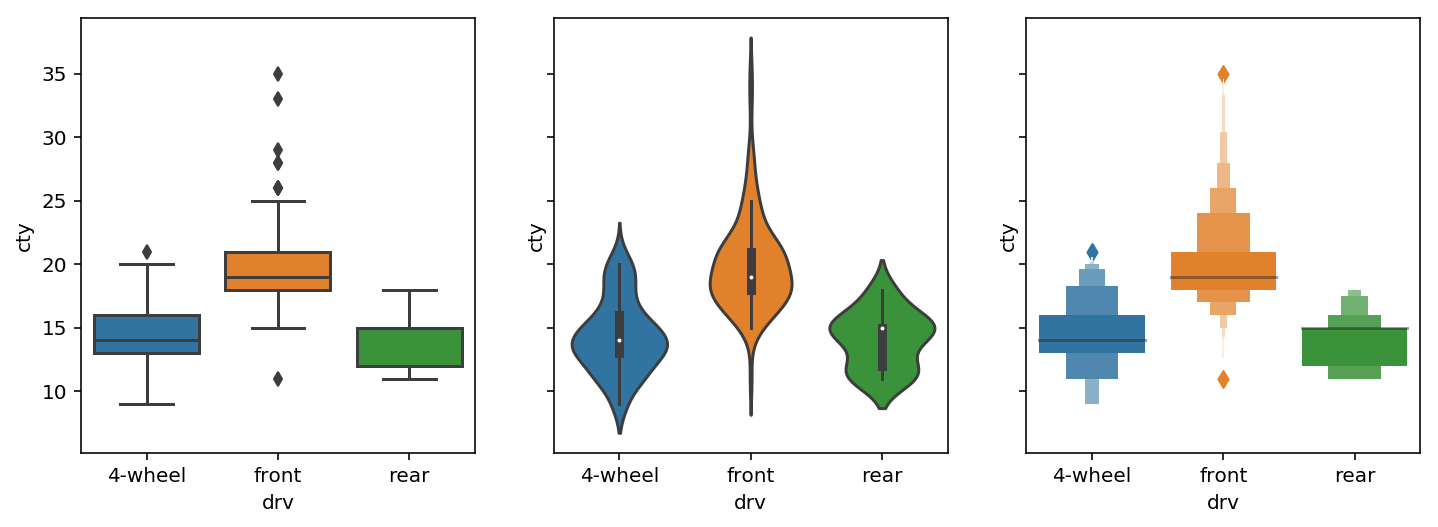

In [15]:
fig, ax = plt.subplots(1, 3, figsize=(12,4), sharey=True, sharex=True)
print(ax.shape)
x_col='drv'
y_col='cty'
sns.boxplot(x=x_col, y=y_col, data=df, ax=ax[0])
sns.violinplot(x=x_col, y=y_col, data=df, ax=ax[1])
sns.lvplot(x=x_col, y=y_col, data=df, ax=ax[2])

(3,)


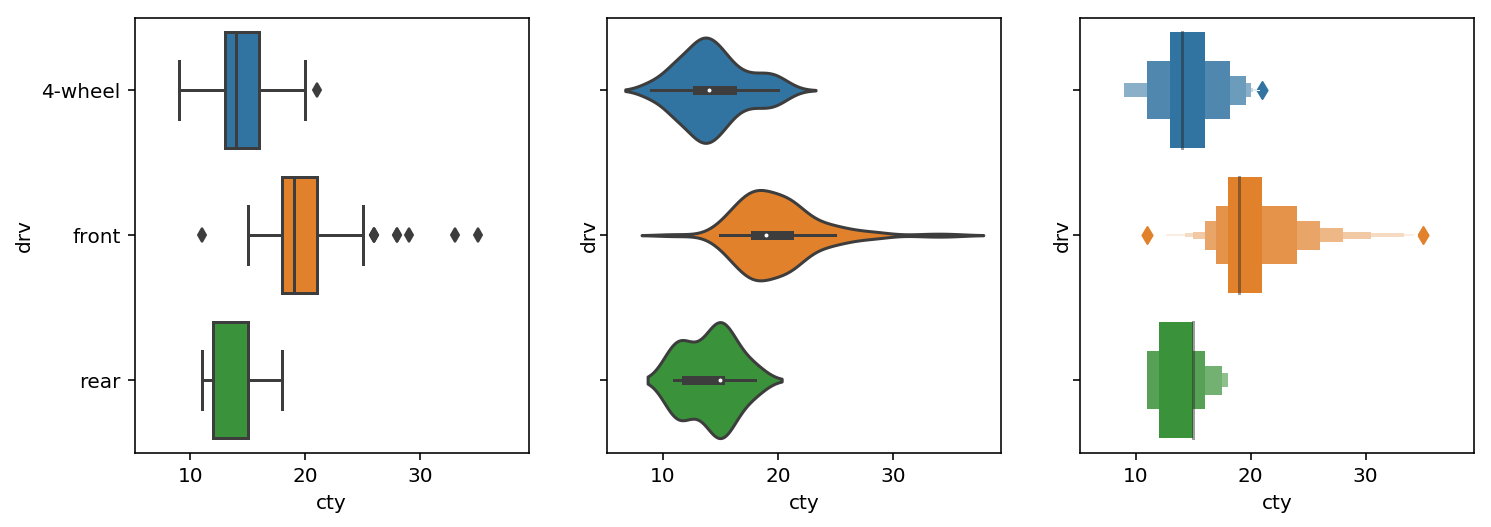

In [16]:
fig, ax = plt.subplots(1, 3, figsize=(12, 4), sharey=True, sharex=True)
print(ax.shape)
x_col='cty'
y_col='drv'
sns.boxplot(x=x_col, y=y_col, data=df, ax=ax[0])
sns.violinplot(x=x_col, y=y_col, data=df, ax=ax[1])
sns.lvplot(x=x_col, y=y_col, data=df, ax=ax[2])

### add hue, custom order and label, title

Text(0.5,1,'miles per gallon by driving system')

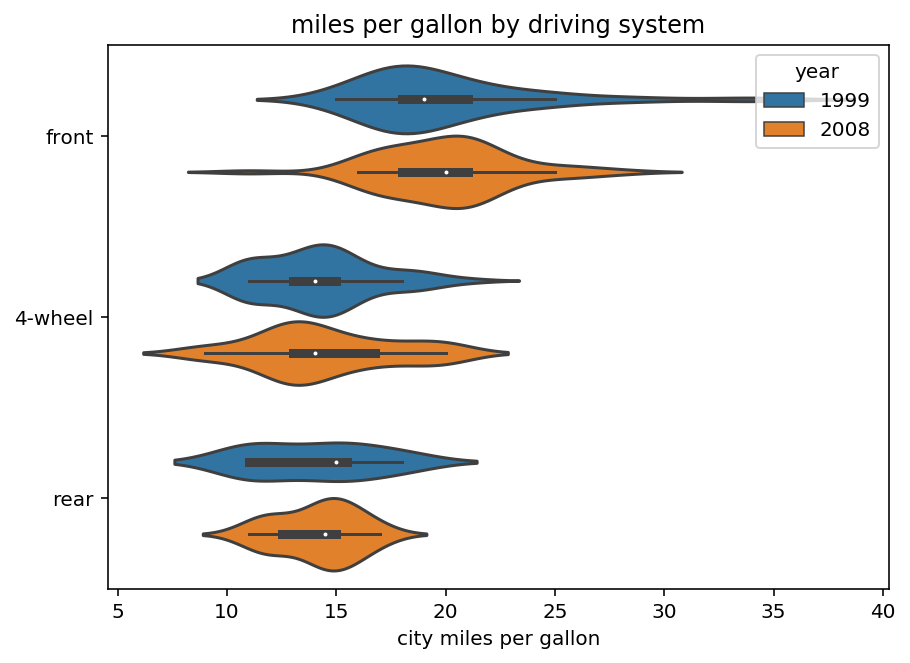

In [17]:
plt.figure(figsize=(7, 5))
sns.violinplot(y='drv', x='cty', data=df,
            hue='year',
            order=['front', '4-wheel', 'rear'])
plt.ylabel('')
plt.xlabel('city miles per gallon')
plt.title('miles per gallon by driving system')

### palette

Text(0.5,1,'miles per gallon by driving system')

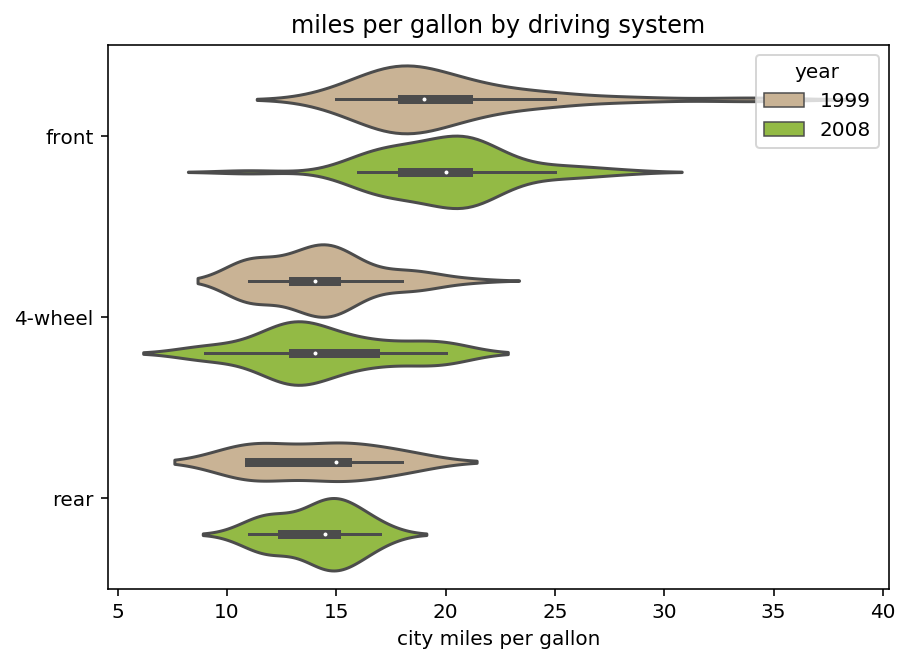

In [18]:
plt.figure(figsize=(7, 5))
sns.violinplot(y='drv', x='cty', data=df,
            hue='year',
#             palette='Set2',
#             palette='muted',
#             palette=['tan', '#aa00aa'],
            palette={1999:'tan', 2008:'yellowgreen'},
            order=['front', '4-wheel', 'rear'])
plt.ylabel('')
plt.xlabel('city miles per gallon')
plt.title('miles per gallon by driving system')

## factorplot

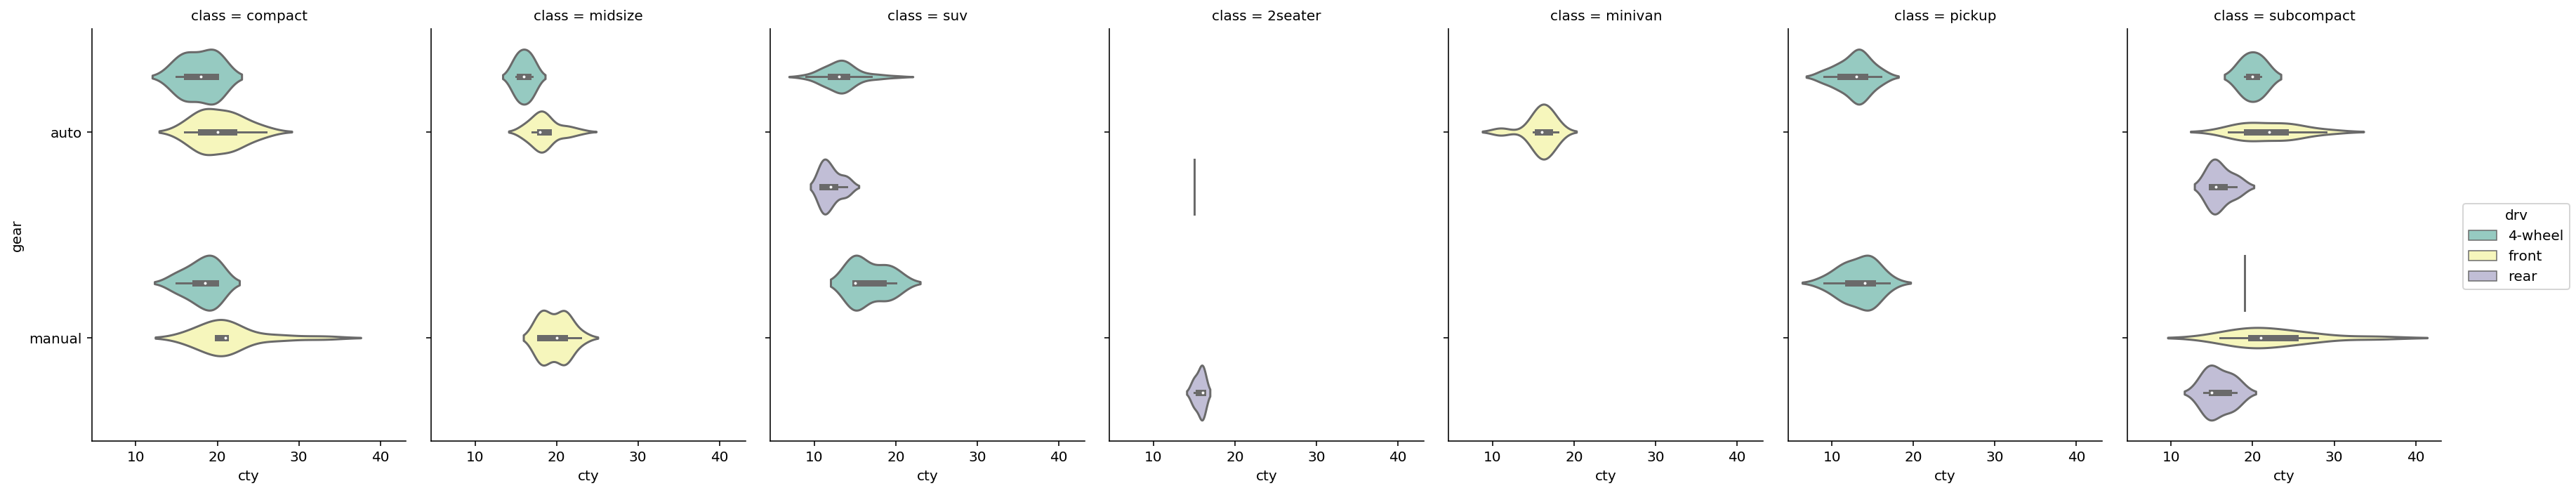

In [19]:
sns.factorplot(y='gear', x='cty', data=df,
               hue='drv',
               kind='violin',
               col='class',
               palette='Set3',
               size=5, aspect=.7)

In [20]:
df['class'].unique()

array(['compact', 'midsize', 'suv', '2seater', 'minivan', 'pickup',
       'subcompact'], dtype=object)

In [21]:
dg=df[df['class'].str.match('^(suv|compact|pickup)')]
dg.sample(5)

,manufacturer,model,displ,year,cyl,trans,drv,cty,hwy,fl,class,gear
216,volkswagen,jetta,2.0,2008,4,manual(m6),front,21,29,p,compact,manual
130,land rover,range rover,4.0,1999,8,auto(l4),4-wheel,11,15,p,suv,auto
153,nissan,pathfinder 4wd,5.6,2008,8,auto(s5),4-wheel,12,18,p,suv,auto
57,dodge,durango 4wd,3.9,1999,6,auto(l4),4-wheel,13,17,r,suv,auto
207,volkswagen,gti,2.0,1999,4,manual(m5),front,21,29,r,compact,manual


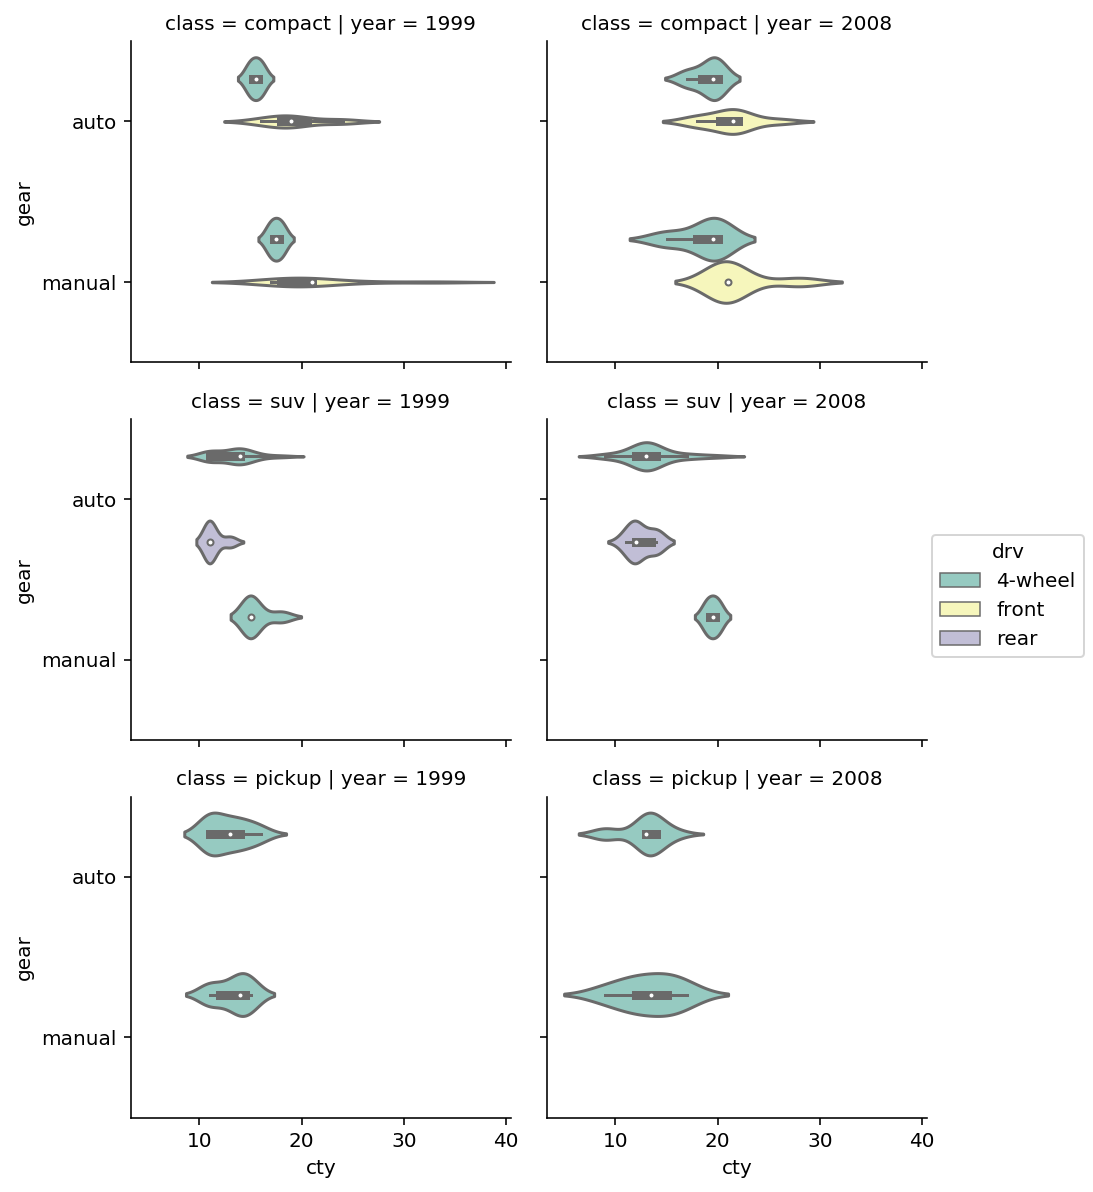

In [22]:
sns.factorplot(y='gear', x='cty', data=dg,
               hue='drv',
               kind='violin',
               col='year',
               row='class',
               palette='Set3',
               size=2.8, aspect=1.2)